In [2]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm.autonotebook import tqdm

C:\Users\Aidan\AppData\Local\Temp\ipykernel_33168\2148902354.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
# Part 1 - Compute exact solution
m=300
n=200

# Use np.loadtxt to read A.txt and b.txt for problem 2
rand = np.random.default_rng(seed=1)
A = rand.normal(size=(m,n))
b = rand.normal(size=(m,))
print(A.shape)
print(b.shape)

xstar = np.linalg.inv(A.T @ A) @ A.T @ b
print(xstar)

(300, 200)
(300,)
[-0.05278919  0.10156609 -0.32379091 -0.02364412  0.03582649 -0.07284554
 -0.08183776 -0.16026776 -0.0628394   0.05103865 -0.08223536  0.06580287
 -0.02915588  0.26927301 -0.28115108 -0.02466485 -0.04807822  0.1240365
 -0.00200894  0.01353134 -0.0171933  -0.03439095 -0.00692005  0.01129027
 -0.03865119 -0.08508469 -0.1863216  -0.06570762  0.10408296 -0.04217803
 -0.07951394  0.02925464 -0.03963213 -0.00220764  0.15014219 -0.07161094
  0.05046434  0.15689002 -0.04884007  0.20534288 -0.00251087 -0.09953448
  0.03064609  0.02021966  0.09385954  0.14977524 -0.05122261  0.00425831
  0.14986892 -0.07838348 -0.11446637 -0.13694619 -0.0298786   0.00667712
  0.20796005 -0.07438512 -0.00948094  0.04868522  0.01723573  0.10533429
  0.0131517   0.1701821   0.05081889 -0.00958712 -0.15563519 -0.05620499
 -0.17351136  0.06055982  0.12012441 -0.16278693  0.05749079  0.04470531
  0.01962354  0.00837255  0.19410146 -0.01123729 -0.14983413  0.18326093
 -0.12754584  0.00552495 -0.004229

In [4]:
# Part 2 - Steepest descent
f = lambda x: 1/2 * np.linalg.norm(A @ x - b,ord = 2) ** 2
df = lambda x: A.T @ A @ x - A.T @ b

lambdas = np.linalg.eigvals(A.T@A)
lambda_max = np.max(lambdas[np.isreal(lambdas)])
print(lambda_max)

# Set stepsizes in terms of lambda expressions that take
# in descent directions and current x
stepsize_fixed = lambda dk, xk: 1/lambda_max
print(1/lambda_max)
stepsize_exactline=lambda dk, xk: -(dk.T @ (A.T @ A @ xk - A.T @ b)) / (dk.T @ A.T @ A @ dk)
def stepsize_armijo(dk, xk):
    s = 0.5
    sigma = 1/4
    beta = 3/4
    alpha = s 
    while f(xk+alpha*dk) - f(xk) >= sigma * alpha * df(xk).T @ dk:
        alpha *= beta
    return alpha

# Define stopping conditions.

epsilon = 10 ** -4

stop_gradnorm = lambda xk: np.linalg.norm(A.T @ A @ xk - A.T @ b, ord=2) <= epsilon
stop_exactdiff = lambda xk: np.linalg.norm(xstar - xk) <= epsilon
stop_valdiff = lambda xk: abs(f(xstar)-f(xk)) <= epsilon

stepsizes = {"fixed": stepsize_fixed, 
             "exact line search": stepsize_exactline,
             "armijo's rule": stepsize_armijo}
stopconds = {"Gradient norm": stop_gradnorm,
             "Diff from exact x": stop_exactdiff,
             "Diff from exact y": stop_valdiff}

936.5094684309973
0.0010677948634896057


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Text(0.5, 0.98, 'Error vs Prev error')

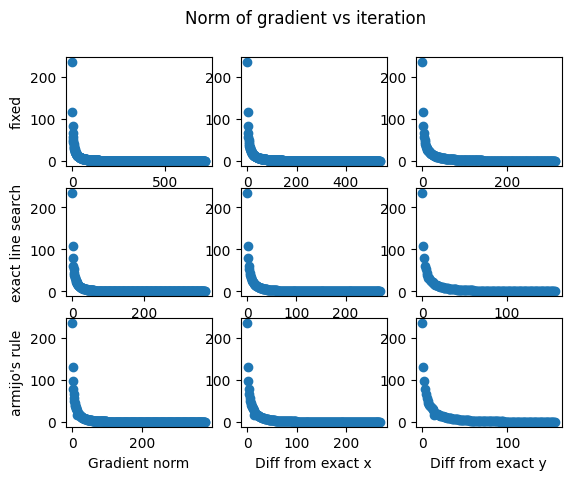

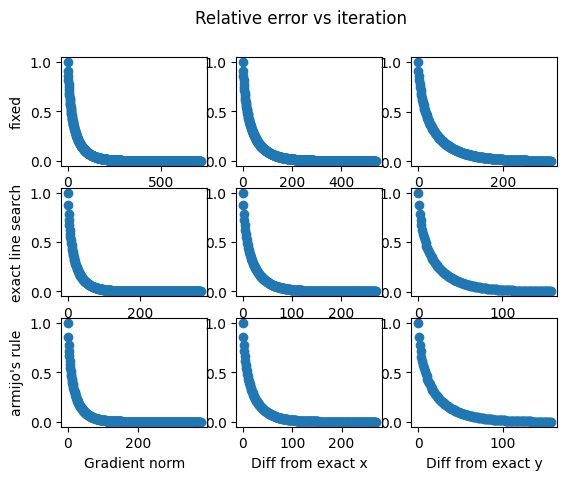

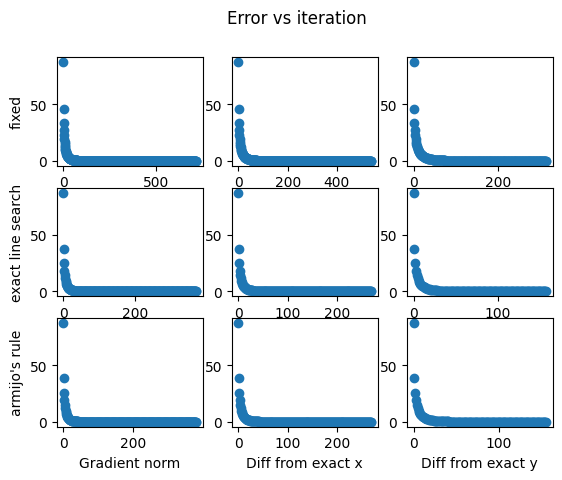

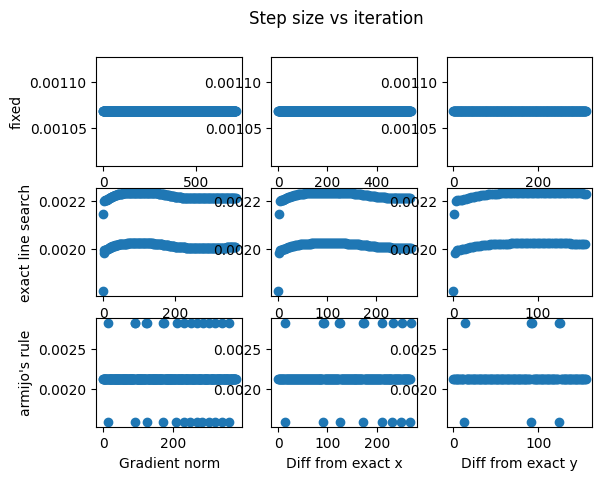

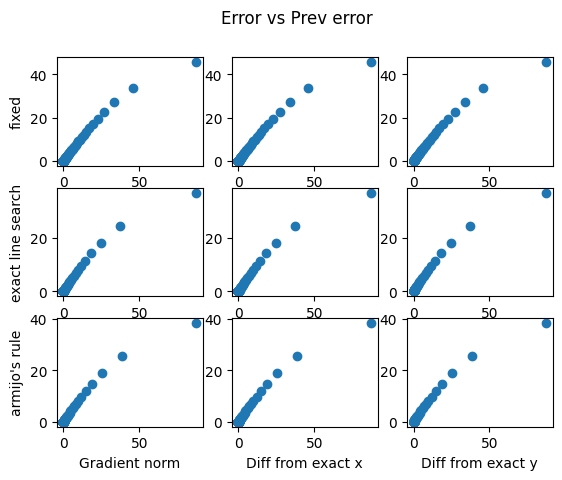

In [5]:

# Run each stepsize, stopcond pair, storing data necessary for plotting

plotdata_steepest = {}
x0=np.zeros((A.shape[1],))

for stepname, stepsize in tqdm(stepsizes.items()):
    for stopname, stopcond in tqdm(stopconds.items()):
        xk = x0
        curalg = (stepname, stopname)
        plotdata_steepest.update({curalg: {"gradnorm": [],
                                    "relerr": [],
                                    "err": [],
                                    "stepsize": [],
                                    "k": 0}})
        while True:
            grad = df(xk)
            dk = -grad
            step = stepsize(dk, xk)
            plotdata_steepest[curalg]["gradnorm"].append(np.linalg.norm(grad))
            plotdata_steepest[curalg]["relerr"].append(
                np.linalg.norm(xstar - xk, ord=2)/ \
                np.linalg.norm(xstar, ord=2))
            plotdata_steepest[curalg]["err"].append(abs(f(xstar) - f(xk)))
            plotdata_steepest[curalg]["stepsize"].append(step)
            if stopcond(xk):
                break
            plotdata_steepest[curalg]["k"] += 1
            xk = xk + step * dk

def data_graph(yname, plotname):
    fig, axs = plt.subplots(3, 3)
    for i, stepname in enumerate(stepsizes.keys()):
        for j, stopname in enumerate(stopconds.keys()):
            alg = (stepname, stopname)
            y = plotdata_steepest[alg][yname]
            x = range(plotdata_steepest[alg]["k"]+1)
            axs[i,j].scatter(x,y)
            if j == 0:
                axs[i,j].set(ylabel=stepname)
            if i == 2:
                axs[i,j].set(xlabel=stopname)
    fig.suptitle(plotname)
data_graph("gradnorm","Norm of gradient vs iteration")
data_graph("relerr","Relative error vs iteration")
data_graph("err","Error vs iteration")
data_graph("stepsize","Step size vs iteration")
fig, axs = plt.subplots(3, 3)
for i, stepname in enumerate(stepsizes.keys()):
    for j, stopname in enumerate(stopconds.keys()):
        alg = (stepname, stopname)
        y = plotdata_steepest[alg]["err"][1:]
        x = plotdata_steepest[alg]["err"][:-1]
        axs[i,j].scatter(x,y)
        if j == 0:
            axs[i,j].set(ylabel=stepname)
        if i == 2:
            axs[i,j].set(xlabel=stopname)
fig.suptitle("Error vs Prev error")

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Text(0.5, 0.98, 'Error vs Prev error')

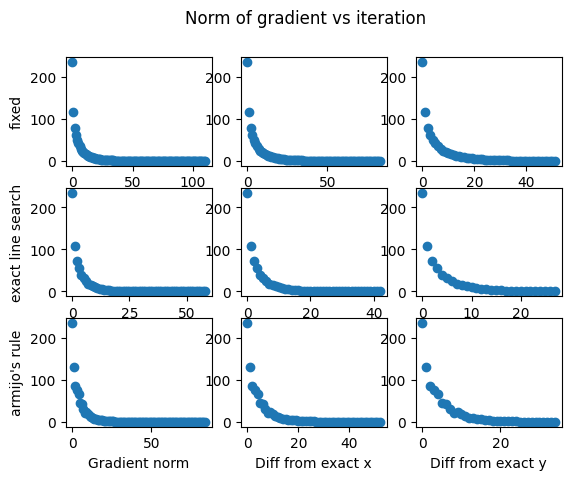

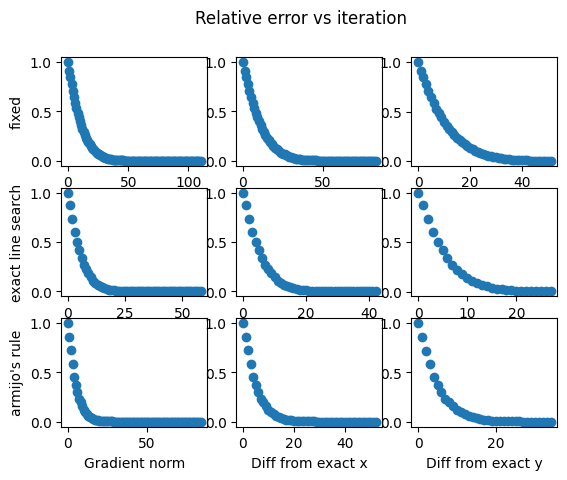

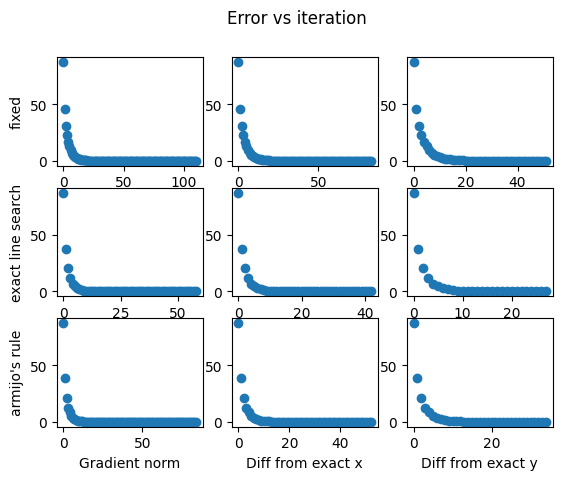

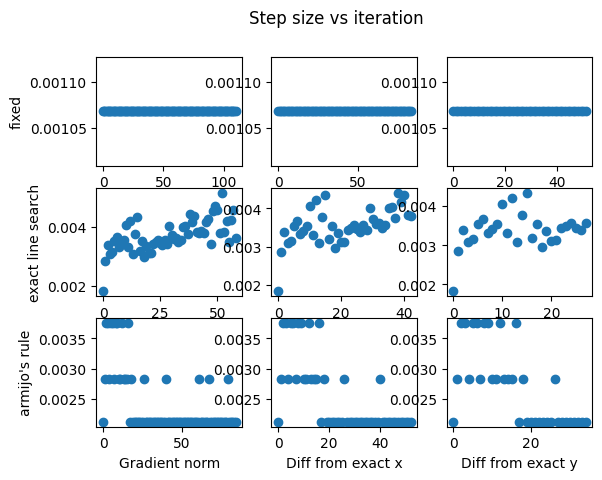

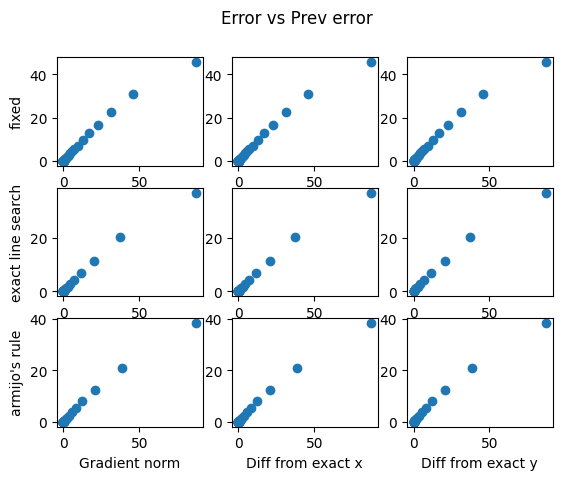

In [6]:
plotdata_conjugate = {}
x0=np.zeros((A.shape[1],))

for stepname, stepsize in tqdm(stepsizes.items()):
    for stopname, stopcond in tqdm(stopconds.items()):
        xk = x0
        curalg = (stepname, stopname)
        plotdata_conjugate.update({curalg: {"gradnorm": [],
                                    "relerr": [],
                                    "err": [],
                                    "stepsize": [],
                                    "k": 0}})
        grad = df(xk)
        dk = -grad
        while True:
            step = stepsize(dk, xk)
            plotdata_conjugate[curalg]["gradnorm"].append(np.linalg.norm(grad))
            plotdata_conjugate[curalg]["relerr"].append(
                np.linalg.norm(xstar - xk, ord=2)/ \
                np.linalg.norm(xstar, ord=2))
            plotdata_conjugate[curalg]["err"].append(abs(f(xstar) - f(xk)))
            plotdata_conjugate[curalg]["stepsize"].append(step)
            if stopcond(xk):
                break
            plotdata_conjugate[curalg]["k"] += 1
            xk = xk + step * dk
            oldgrad = grad
            grad = df(xk)
            if np.linalg.norm(grad,ord=2)<=10e-8:
                break
            beta = (grad.T @ grad)/(oldgrad.T @ oldgrad) # Fletcher-Reeves
            dk = -grad + beta * dk
def data_graph(yname, plotname):
    fig, axs = plt.subplots(3, 3)
    for i, stepname in enumerate(stepsizes.keys()):
        for j, stopname in enumerate(stopconds.keys()):
            alg = (stepname, stopname)
            y = plotdata_conjugate[alg][yname]
            x = range(plotdata_conjugate[alg]["k"]+1)
            axs[i,j].scatter(x,y)
            if j == 0:
                axs[i,j].set(ylabel=stepname)
            if i == 2:
                axs[i,j].set(xlabel=stopname)
    fig.suptitle(plotname)
data_graph("gradnorm","Norm of gradient vs iteration")
data_graph("relerr","Relative error vs iteration")
data_graph("err","Error vs iteration")
data_graph("stepsize","Step size vs iteration")
fig, axs = plt.subplots(3, 3)
for i, stepname in enumerate(stepsizes.keys()):
    for j, stopname in enumerate(stopconds.keys()):
        alg = (stepname, stopname)
        y = plotdata_conjugate[alg]["err"][1:]
        x = plotdata_conjugate[alg]["err"][:-1]
        axs[i,j].scatter(x,y)
        if j == 0:
            axs[i,j].set(ylabel=stepname)
        if i == 2:
            axs[i,j].set(xlabel=stopname)
fig.suptitle("Error vs Prev error")

Text(0.5, 0.98, 'Relative error vs iteration k for steepest descent vs conjugate method')

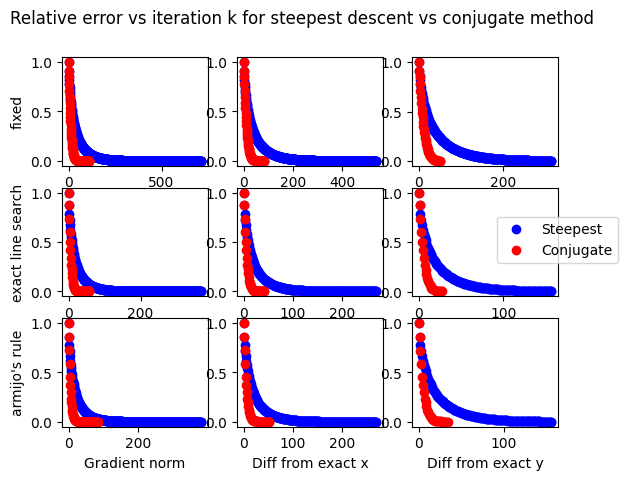

In [7]:
fig, axs = plt.subplots(3, 3)
for i, stepname in enumerate(stepsizes.keys()):
    for j, stopname in enumerate(stopconds.keys()):
        alg = (stepname, stopname)
        y = plotdata_steepest[alg]["relerr"]
        x = range(plotdata_steepest[alg]["k"]+1)
        axs[i,j].scatter(x,y,c='b',label="Steepest")
        y = plotdata_conjugate[alg]["relerr"]
        x = range(plotdata_conjugate[alg]["k"]+1)
        axs[i,j].scatter(x,y,c='r',label="Conjugate")
        if j == 0:
            axs[i,j].set(ylabel=stepname)
        if i == 2:
            axs[i,j].set(xlabel=stopname)
handles, labels = fig.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc="center right")
fig.suptitle("Relative error vs iteration k for steepest descent vs conjugate method")

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

KeyError: ('DFP', 'Identity')

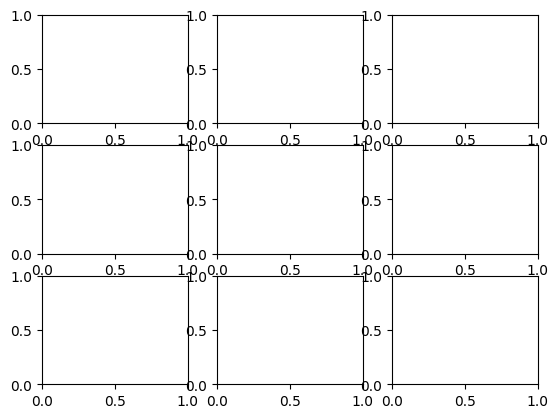

In [28]:
plotdata_quasinewton = {}
x0=np.zeros((A.shape[1],))

formulas = {
    "DFP": lambda pk, qk, Vk: Vk + (pk @ pk.T)/(pk.T @ qk) - (Vk @ qk @ qk.T @ Vk)/(qk.T @ Vk @ qk),
    "BFGS": lambda pk, qk, Vk: Vk + (1 + (qk.T @ Vk @ qk)/(pk.T @ qk)) * (pk @ pk.T)/(pk.T @ qk) - (pk @ qk.T @ Vk + Vk @ qk @ pk.T)/(pk.T @ qk)
}

V0s = {
    "Identity": np.identity(n),
    "Inverse Hessian": np.linalg.inv(A.T @ A)
}

for stepname, stepsize in tqdm(stepsizes.items()):
    for stopname, stopcond in tqdm(stopconds.items()):
        curalg = (stepname, stopname)
        plotdata_quasinewton.update({curalg: {}})
        for formname, formula in tqdm(formulas.items()):
            for vname, V0 in tqdm(V0s.items()):
                curquasi = (formname, vname)
                plotdata_quasinewton[curalg].update({curquasi: {"gradnorm": [],
                                    "relerr": [],
                                    "err": [],
                                    "stepsize": [],
                                    "k": 0}})
                Vk = V0
                xk = x0
                grad = df(xk)
                while True:
                    dk = -Vk @ grad
                    step = stepsize(dk, xk)
                    plotdata_quasinewton[curalg][curquasi]["gradnorm"].append(np.linalg.norm(grad))
                    plotdata_quasinewton[curalg][curquasi]["relerr"].append(
                        np.linalg.norm(xstar - xk, ord=2)/ \
                        np.linalg.norm(xstar, ord=2))
                    plotdata_quasinewton[curalg][curquasi]["err"].append(abs(f(xstar) - f(xk)))
                    plotdata_quasinewton[curalg][curquasi]["stepsize"].append(step)
                    if stopcond(xk):
                        break
                    plotdata_quasinewton[curalg][curquasi]["k"] += 1
                    oldxk = xk
                    xk = xk + step * dk
                    oldgrad = grad
                    grad = df(xk)
                    pk = xk - oldxk
                    qk = grad - oldgrad
                    Vk = formula(pk[np.newaxis].T, qk[np.newaxis].T, Vk)


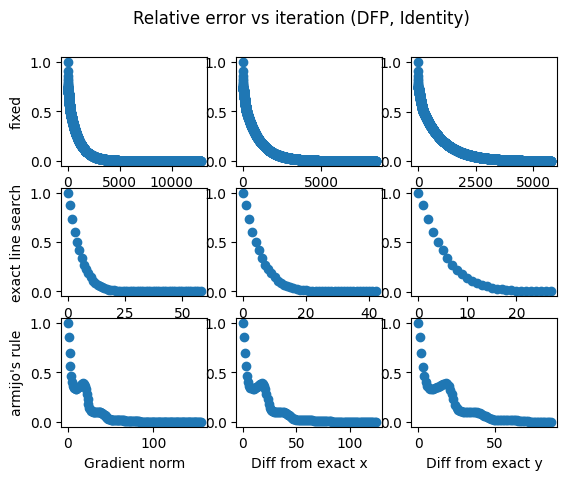

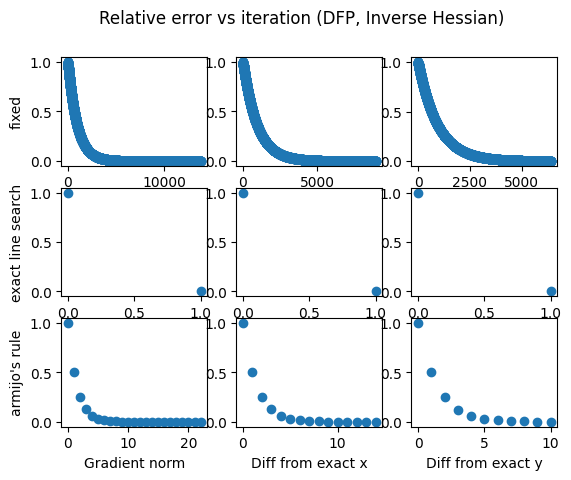

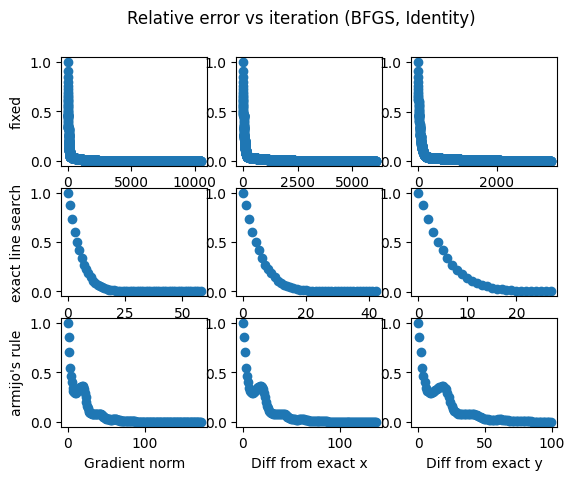

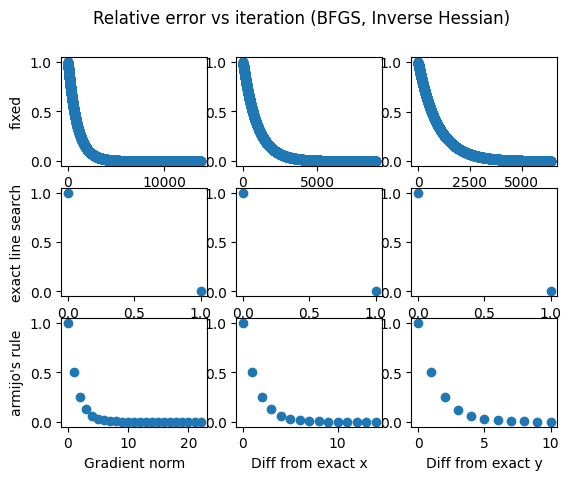

In [32]:

colormap = {("DFP","Identity"): 'b', ("DFP","Inverse Hessian"): 'r',
            ("BFGS","Identity"): 'y', ("BFGS","Inverse Hessian"): 'g'}                    
for formname in formulas.keys():
    for vname in V0s.keys():
        fig, axs = plt.subplots(3, 3)
        for i, stepname in enumerate(stepsizes.keys()):
            for j, stopname in enumerate(stopconds.keys()):
                alg = (stepname, stopname)
                quasi = (formname, vname)
                y = plotdata_quasinewton[alg][quasi]["relerr"]
                x = range(plotdata_quasinewton[alg][quasi]["k"]+1)
                axs[i,j].scatter(x,y)
                if j == 0:
                    axs[i,j].set(ylabel=stepname)
                if i == 2:
                    axs[i,j].set(xlabel=stopname)
        fig.suptitle("Relative error vs iteration (" + formname + ", " + vname +")")

In [27]:
plotdata_quasinewton[curalg][curquasi]["relerr"]

[1.0,
 0.9128622787203016,
 32.04399445281975,
 19459.286578411487,
 13356397.7735907,
 9765123298.451864,
 7421505434108.341,
 5793582815560849.0,
 4.614554179181759e+18,
 3.734615352944191e+21,
 3.0627627005929386e+24,
 2.5403987423798147e+27,
 2.128087963267621e+30,
 1.7983775102240526e+33,
 1.531651089209802e+36,
 1.3136030103594018e+39,
 1.1336284357521754e+42,
 9.837586855684071e+44,
 8.579356108963112e+47,
 7.515051360046655e+50,
 6.6085707156152115e+53,
 5.83165114305792e+56,
 5.161969026701086e+59,
 4.581738670028907e+62,
 4.076669345790499e+65,
 3.635183223467774e+68,
 3.247824746986957e+71,
 2.9068115455860393e+74,
 2.6056906585658757e+77,
 2.3390735959095421e+80,
 2.1024307548622177e+83,
 1.891930780858362e+86,
 1.70431415613798e+89,
 1.5367930081091685e+92,
 1.3869711248428637e+95,
 1.2527796413608351e+98,
 1.1324249571456715e+101,
 1.0243462634201897e+104,
 9.271806714926264e+106,
 8.397343943164136e+109,
 7.609587815344836e+112,
 6.899302724481963e+115,
 6.25833532783375